<a href="https://colab.research.google.com/github/Diksha-mor21/Used_Cars_Analysis/blob/main/Used_Car_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install advanced visualization libraries (if not already installed)
!pip install seaborn plotly pandas-profiling matplotlib

# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# pandas-profiling has been renamed to ydata-profiling
from ydata_profiling import ProfileReport # Changed import statement from pandas_profiling to ydata_profiling




In [5]:
from google.colab import files
uploaded = files.upload()  # Upload the file manually through Colab

# Load dataset
df = pd.read_csv('used_car_dataset.csv')
df.head()


Saving used_car_dataset.csv to used_car_dataset.csv


,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [10]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Handle missing values
df = df.dropna()

# Convert kmDriven and AskPrice to numeric (remove special characters)
# Assuming the original column name was 'KMDriven' or  'kmDriven', change it to 'km_driven'
df = df.rename(columns={'kmdriven': 'km_driven', 'kmDriven': 'km_driven'}) # try both 'kmdriven' and 'kmDriven'

# Check if km_driven is already numeric, if not, convert it to string first
if not pd.api.types.is_numeric_dtype(df['km_driven']):
    df['km_driven'] = df['km_driven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)
else:
    print("km_driven column is already numeric.") # Optional: Print a message if already numeric

# Replace '₹' and ','  before converting to float
df['askprice'] = df['askprice'].str.replace('₹', '').str.replace(',', '').str.strip().astype(float) # This line is modified

# Preview cleaned data
df.info()

km_driven column is already numeric.
<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   year          9535 non-null   int64  
 3   age           9535 non-null   int64  
 4   km_driven     9535 non-null   float64
 5   transmission  9535 non-null   object 
 6   owner         9535 non-null   object 
 7   fueltype      9535 non-null   object 
 8   posteddate    9535 non-null   object 
 9   additioninfo  9535 non-null   object 
 10  askprice      9535 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 893.9+ KB


In [11]:
# Basic statistics
df.describe()

# Check for unique values
df.nunique()


,0
brand,38
model,398
year,32
age,32
km_driven,1745
transmission,2
owner,2
fueltype,3
posteddate,12
additioninfo,7270


In [12]:
# Create a profiling report
profile = ProfileReport(df, title="Used Car Data Analysis", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

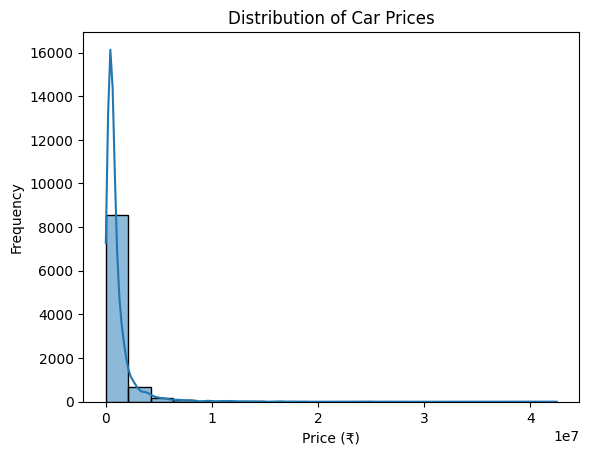

In [13]:
#Distribution of Prices
sns.histplot(df['askprice'], kde=True, bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()


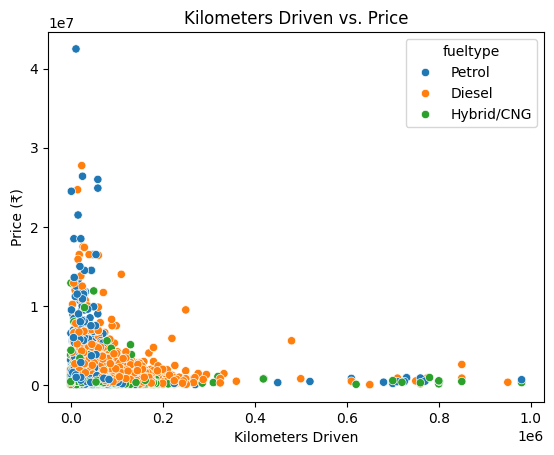

In [14]:
#Mileage vs. Price
sns.scatterplot(x='km_driven', y='askprice', hue='fueltype', data=df)
plt.title('Kilometers Driven vs. Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (₹)')
plt.show()


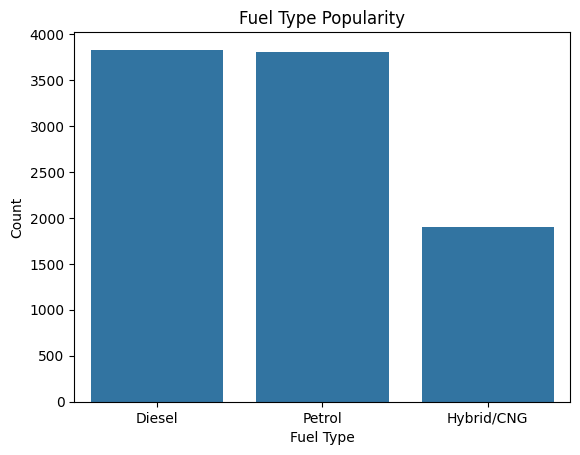

In [16]:
#Bar Plot: Fuel Type Popularity
fuel_counts = df['fueltype'].value_counts()
sns.barplot(x=fuel_counts.index, y=fuel_counts.values)
plt.title('Fuel Type Popularity')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [17]:
#Interactive Visualization with Plotly
fig = px.scatter(df, x='km_driven', y='askprice', color='fueltype',
                 hover_data=['brand', 'model', 'year'],
                 title='Interactive Plot: Kilometers vs Price')
fig.show()

In [18]:
#Brand-Wise Price Distribution
fig = px.box(df, x='brand', y='askprice', color='brand', title="Brand-Wise Price Distribution")
fig.show()

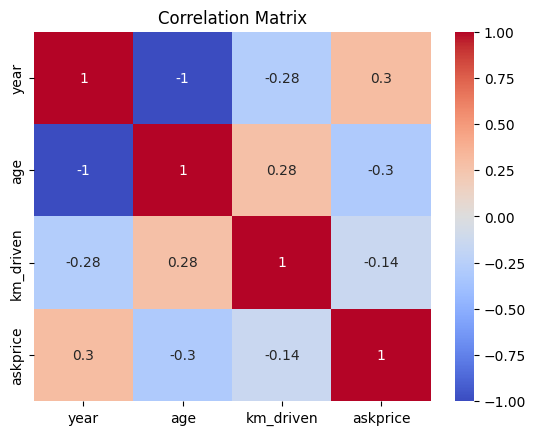

In [20]:
#Correlation Analysis:
corr = df.select_dtypes(include=np.number).corr() # Select only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

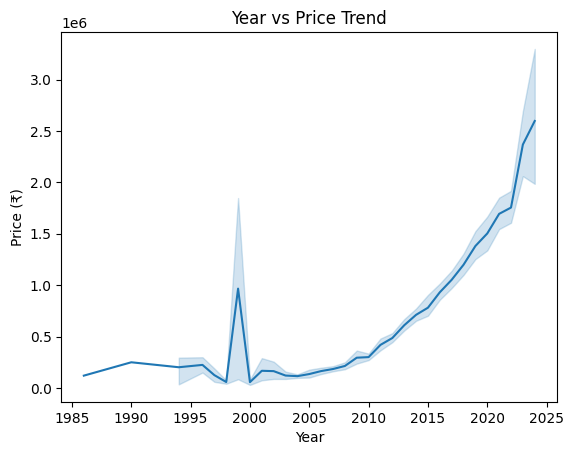

In [21]:
#Year vs Price:
sns.lineplot(x='year', y='askprice', data=df)
plt.title('Year vs Price Trend')
plt.xlabel('Year')
plt.ylabel('Price (₹)')
plt.show()

**Conclusions and Insights**

After analyzing the dataset and visualizing various aspects, here are the key conclusions and insights:

1. **Price Distribution**
Most used cars are priced between ₹2,00,000 and ₹10,00,000.
High-end luxury cars (like BMW and Mercedes-Benz) significantly increase the average price in the dataset.

2. **Kilometers Driven vs. Price**
Cars with higher mileage generally have lower prices, as expected.
Some exceptions are observed for well-maintained or luxury vehicles, where higher mileage does not drastically reduce the price (e.g., BMW 5 Series).

3. **Fuel Type Preferences**
  

*  Diesel Cars - Popular among higher mileage vehicles, indicating their use for long-distance travel.
Prices for diesel cars show a wide range, from budget-friendly to luxury.
* Petrol Cars:
More common in the lower mileage range, suggesting urban or personal use.
Generally more affordable than diesel cars in this dataset.
4. **Transmission Type**
Manual transmission cars dominate the dataset, indicating their popularity in the market.
Automatic transmission cars are priced higher, especially in premium brands like BMW and Mercedes-Benz.
5. **Brand Trends**

*      Maruti Suzuki:
Most listed brand, reflecting its dominance in the Indian car market.
Cars are priced in the affordable segment, between ₹2,00,000 and ₹7,00,000.
*Toyota:
Known for durability, models like Innova hold value well despite higher mileage and age.
*Luxury Brands (BMW, Mercedes-Benz):
Command significantly higher prices, even with older models and second ownership.
6. **Ownership**
Second-owner cars dominate the dataset, possibly due to
      * affordability
      * availability in the market.

First-owner cars are generally newer models and command higher prices.
7. **Age of Cars**
    * Older cars (10+ years) are priced lower, aligning with depreciation trends.
    * Relatively new cars (1-5 years) retain higher value, especially premium models like the Kia Carnival.
8. **Year vs. Price Trend**
A strong correlation is observed between the year of manufacture and the price.
    * Newer models command higher prices
    * while older models are more affordable.
    * Exceptions include iconic or well-maintained models, which retain value better.
9. **Popular Models** -


     Affordable Options:
*   Honda City
*  Maruti Suzuki Alto K10
*   Toyota Corolla
            Premium Choices:
   *   BMW 5 Series  
   *   Mercedes-Benz GLE COUPE
  
10. **Additional Features**- Features like "Advanced Seq. CNG" and "Premium 8 STR" are highlighted for specific models, suggesting that well-maintained or feature-packed cars can demand higher prices.

**Actionable Insights for Buyers and Sellers**

*For Buyers:*


*   Look for slightly older models (5-7 years) to get a balance of affordability and reliability.
*   Diesel cars are ideal for long-distance use, while petrol cars are better suited for city driving.



*For Sellers:*


*   Highlight unique features and maintenance history to justify higher asking prices.
*   Luxury brands can retain higher value if mileage is moderate and the condition is excellent.




